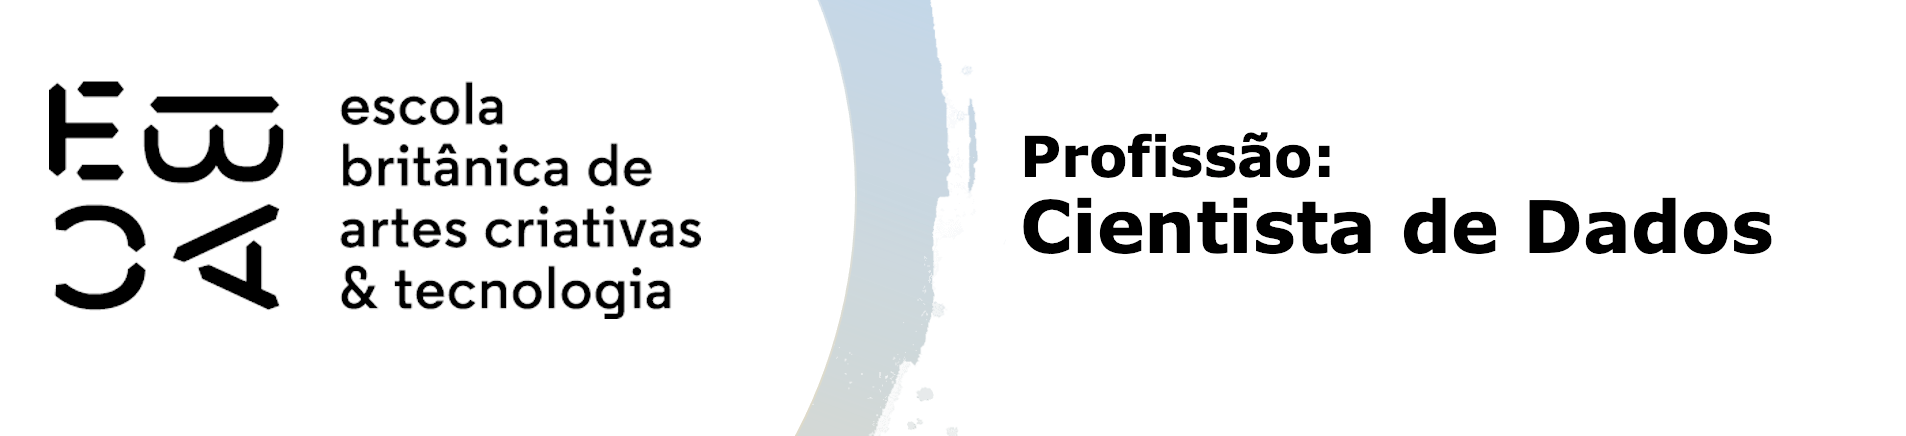

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
# Selecione as variáveis quantitativas da base de pinguins e eliminando valores faltantes
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number').dropna() 
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
id,,,,
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [3]:
# Padronizando as variáveis para média zero e desvio padrão 1
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)
peng_padronizado = pd.DataFrame(peng_pad, columns=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
peng_padronizado.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020


In [4]:
# Fazendo um agrupamento hierárquico dividindo essa base em 3 grupos
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

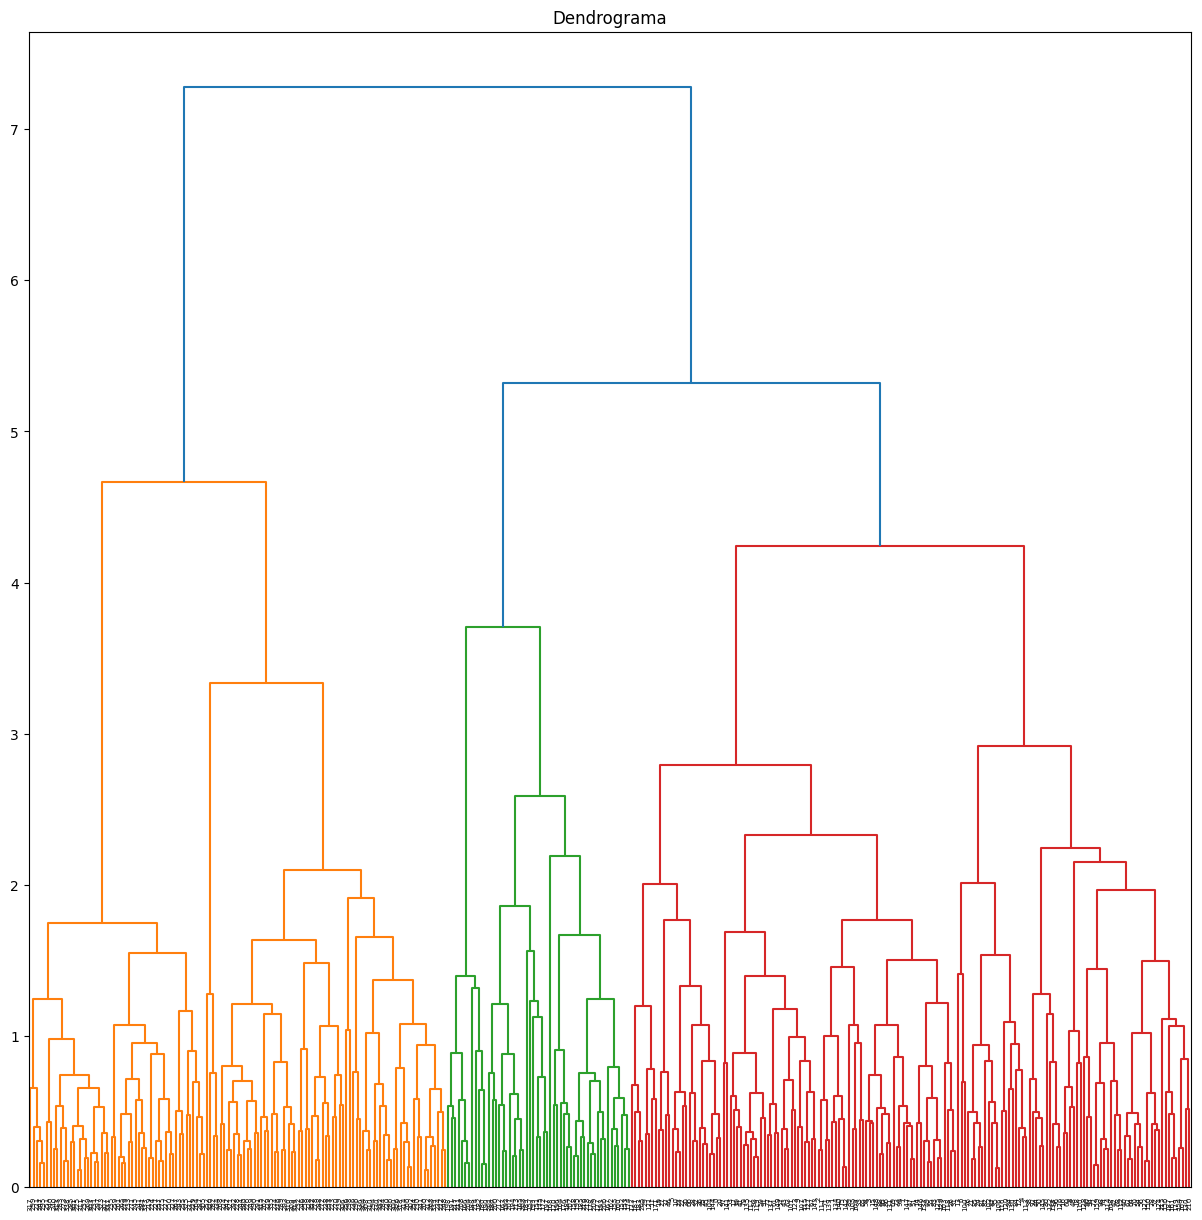

In [5]:
# Fazendo o Dendrograma
plt.figure(figsize=(15, 15))
plt.title("Dendrograma")
dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))
plt.savefig('./output/dendrograma.jpg')

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [6]:
peng_num['grupo'] = clus.labels_
peng = peng.merge(peng_num['grupo'], how='left', on='id')
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0


In [7]:
# Quantos pinguins de cada espécie há em cada grupo
pd.crosstab(peng['species'], peng['grupo'])

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


In [8]:
# Quantos pinguins de cada espécie há em cada grupo proporcionalmente
crosstab_normalize = pd.crosstab(peng['species'], peng['grupo'], normalize='index')
crosstab_normalize

grupo,0.0,1.0,2.0
species,,,
Adelie,0.0,1.000000,0.000000
Chinstrap,0.0,0.205882,0.794118
Gentoo,1.0,0.000000,0.000000


In [9]:
# Poporção pinguins Chinstrap por grupo
crosstab_normalize.loc['Chinstrap']

grupo
0.0    0.000000
1.0    0.205882
2.0    0.794118
Name: Chinstrap, dtype: float64

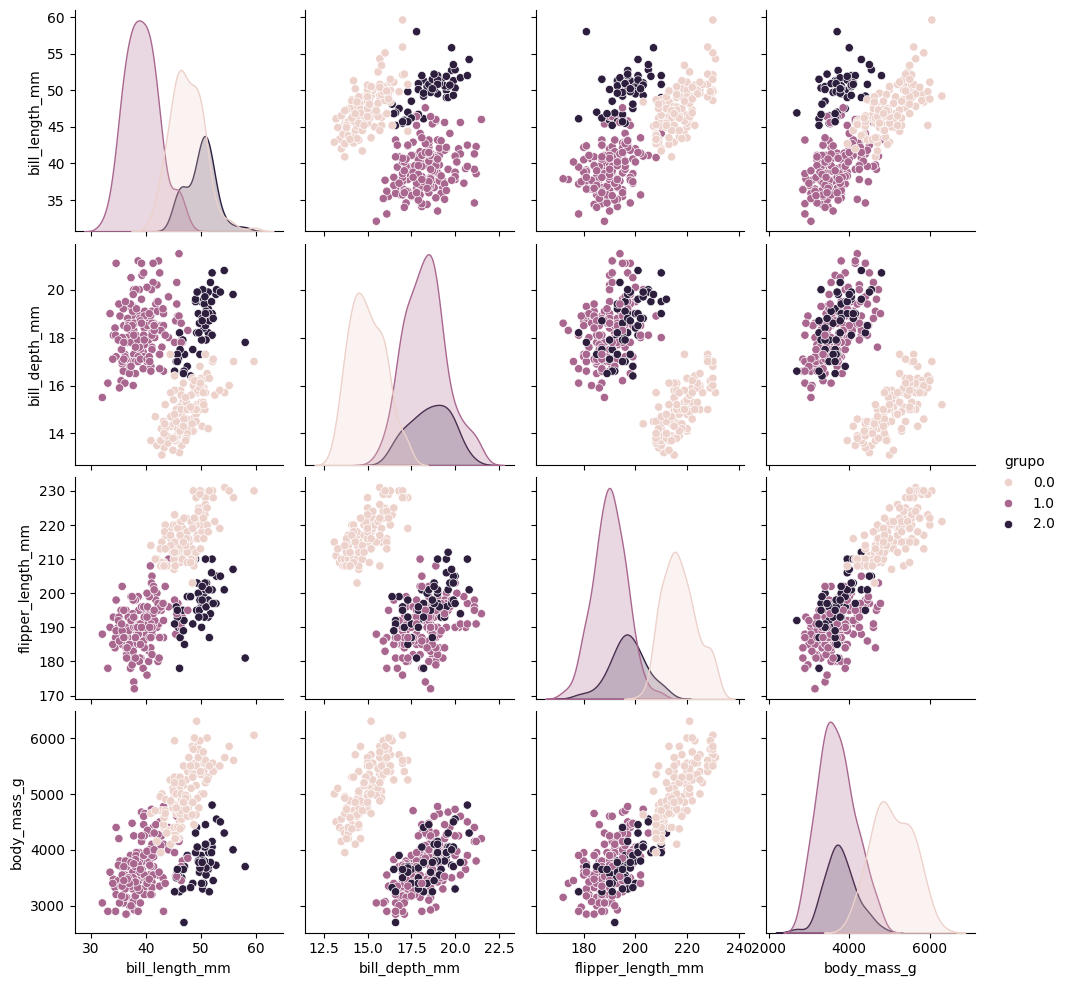

In [10]:
# Pairplot
sns.pairplot(data=peng, hue='grupo')
plt.savefig('./output/pairplot_3.jpg')

### Insights:
 - O algoritmo conseguiu classificar todos os pinguins da espécie Adelie no grupo 1.
 - O algoritmo conseguiu classificar todos os pinguins da espécie Gentoo no grupo 3.
 - O algoritmo classificou 80% dos pinguins da espécie Chinstrap como pertencentes ao grupo 2 e os restantes como pertencentes ao grupo 1.
 - Podemos ver esse comportamento com clareza nas variáveis, pois, em muitos momentos, os grupos 1 e 2 se misturam.

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

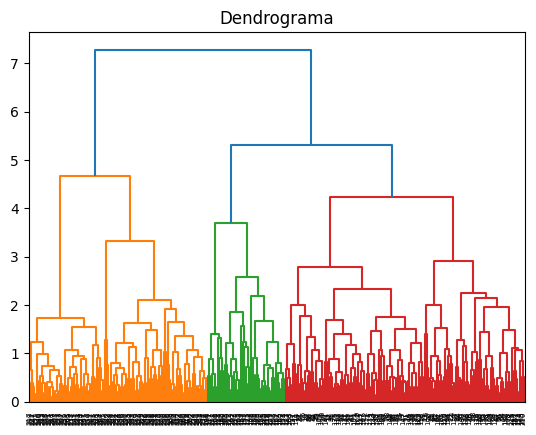

In [11]:
plt.title("Dendrograma")
dend = shc.dendrogram(shc.linkage(peng_padronizado, method='complete'))

Visualizando o dendrograma, podemos tentar dividir em 4 grupos, visto que não há uma distância significativa para o terceiro grupo. Podemos notar também que, na divisão em 5 grupos, a distância é quase mínima para próximo cluster, o que nos obrigaria praticamente a fazer a divisão em 6 grupos. Além disso, a distância para mais grupos é mínima e resultaria em grupos com poucos dados significativos.

In [12]:
# Então seguiremos com 4 grupos
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=4)
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=4)

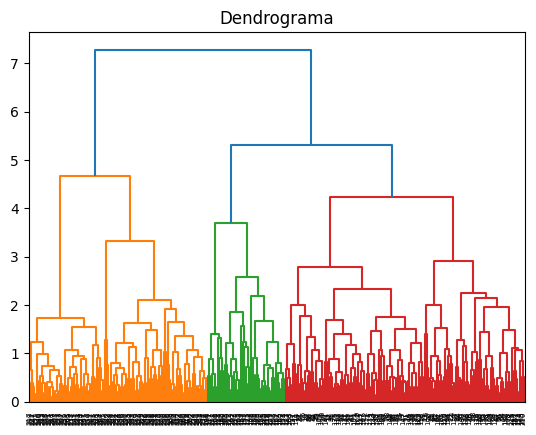

In [13]:
plt.title("Dendrograma")
dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

In [14]:
peng_num['grupo_4'] = clus.labels_
peng = peng.merge(peng_num['grupo_4'], how='left', on='id')
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo,grupo_4
id,,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,0.0


In [15]:
pd.crosstab([peng['species'], peng['sex']], peng['grupo_4'])

grupo_4           0.0  1.0  2.0  3.0
species   sex                       
Adelie    Female   73    0    0    0
          Male     73    0    0    0
Chinstrap Female   14    0   20    0
          Male      0    0   34    0
Gentoo    Female    0    9    0   49
          Male      0   61    0    0

In [16]:
crosstab_normalize2 = pd.crosstab([peng['species'], peng['sex']], peng['grupo_4'], normalize='index')
crosstab_normalize2

grupo_4                0.0       1.0       2.0       3.0
species   sex                                           
Adelie    Female  1.000000  0.000000  0.000000  0.000000
          Male    1.000000  0.000000  0.000000  0.000000
Chinstrap Female  0.411765  0.000000  0.588235  0.000000
          Male    0.000000  0.000000  1.000000  0.000000
Gentoo    Female  0.000000  0.155172  0.000000  0.844828
          Male    0.000000  1.000000  0.000000  0.000000

In [17]:
crosstab_female = crosstab_normalize2.query('sex == "Female"')
crosstab_female = crosstab_female.reset_index(level='sex', drop=True)
crosstab_female

grupo_4,0.0,1.0,2.0,3.0
species,,,,
Adelie,1.000000,0.000000,0.000000,0.000000
Chinstrap,0.411765,0.000000,0.588235,0.000000
Gentoo,0.000000,0.155172,0.000000,0.844828


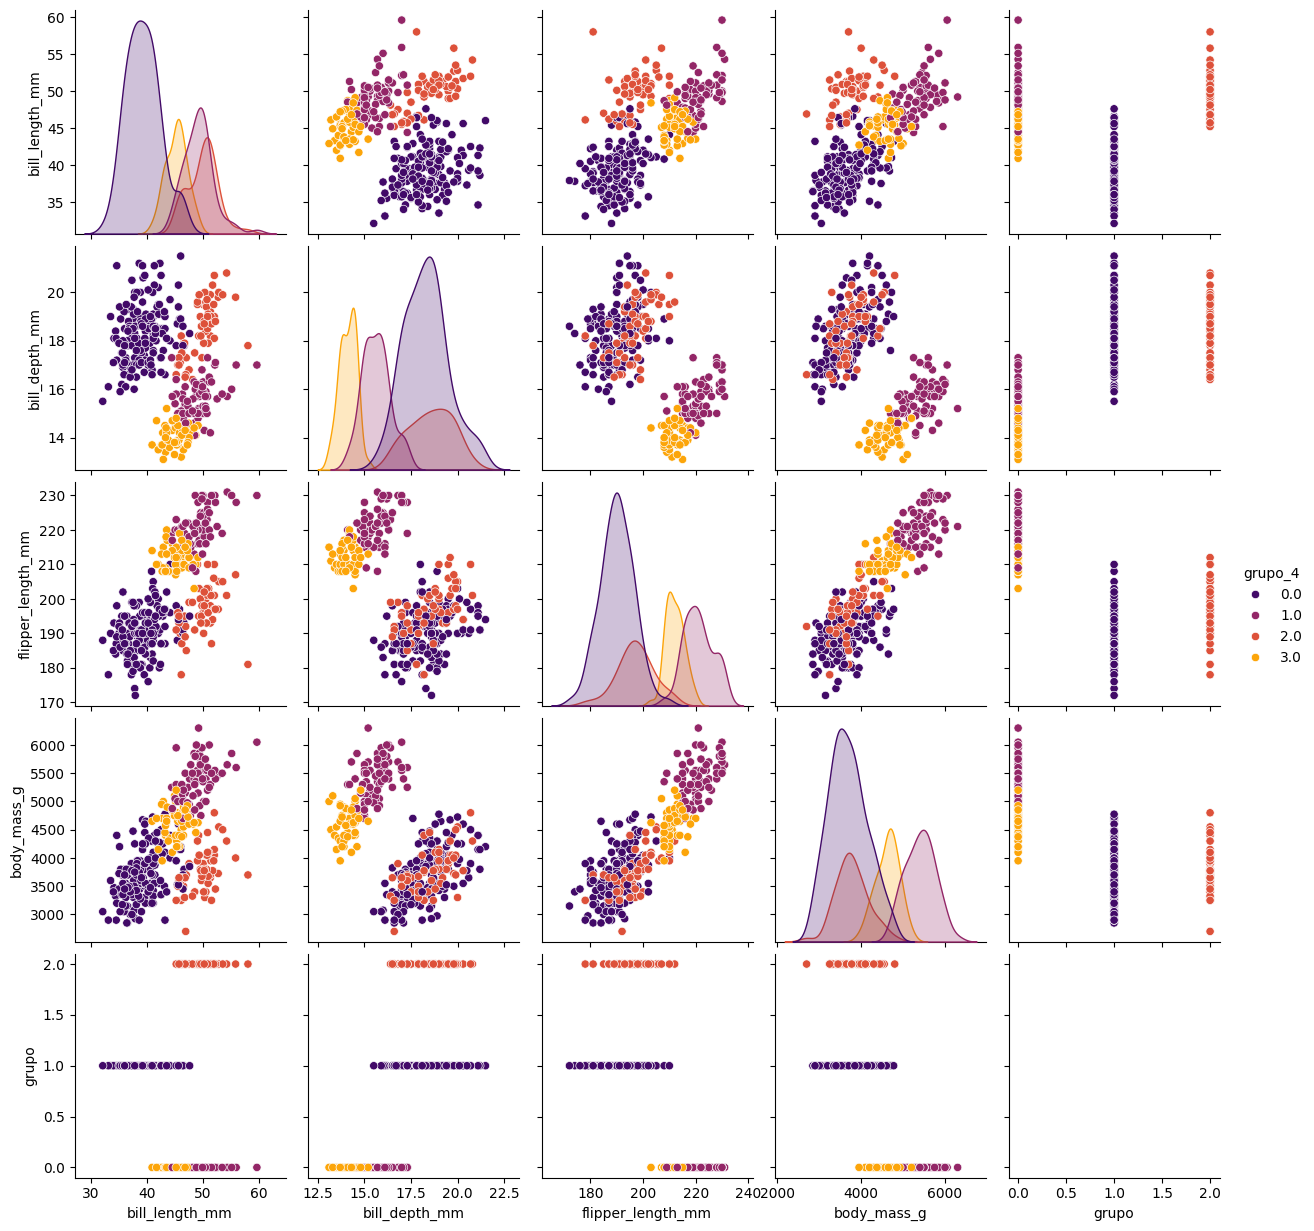

In [18]:
palette = sns.color_palette("inferno", 4)
sns.pairplot(data=peng, hue='grupo_4', palette=palette)
plt.savefig('./output/pairplot_4.jpg')

### Insight:
 - O algoritmo conseguiu classificar todos os pinguins machos da espécie Adelie, Gentoo e Chinstrap unanimidade nos grupos 0,1 e 2.
 - o  grupo 3, o grupo extra dessa avaliação, comporta apenas pinguins do sexo feminino e todos da espécie Gentoo.
 - O algoritmo classificou 59% dos pinguins fêmeas da espécie Chinstrap como pertencentes ao grupo 2 e 41% como pertencentes ao grupo 0, ou seja, um aumento em relação à a analíse com 3 clusters.
 - O algoritmo classificou 84% dos pinguins fêmeas da espécie Gentoo como pertecentes ao grupo 3 e o restante pertecendo ao grupo 1.
 - Podemos ver esses comportamentos com clareza nas variáveis, pois, em muitos momentos, os grupos 0 e 2 se misturam.